In [58]:
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text',usetex=True)
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)

(None, None, None)

# Stack satellite/bkg/central catalogs

In [61]:
import glob
z_low = 0.7
z_high = 0.9
z_mean = round((z_low+z_high)/2,1)

# satellite (central aperture) catalog
file_list = glob.glob('CUT_deep_catalogs/satellite_catalogs_45_newbkg_newz/*.fits') #satellite_catalogs_0704
cat_stack = np.array([])
count = 0
for filename in file_list:
    z_host = eval(filename.split('_')[-2])
    count += 1
    if count%1000==0: print(count)
    if z_host>z_low and z_host<z_high:
        cat=Table.read(filename)
        if len(cat_stack)==0:
            cat_stack = cat.copy()
        else:
            cat_stack = vstack([cat_stack,cat])
print(len(cat_stack))
cat_stack.write('CUT_deep_catalogs/satellite_sample_total_'+str(round(z_mean,1))+'.fits',overwrite=True)
print('cat_sat') 

# contaminating object (background aperture) catalog
file_list = glob.glob('CUT_deep_catalogs/background_catalogs_45_newbkg_newz/*.fits')

cat_stack_bkg = np.array([])
bkg_apers = 0
for filename in file_list:
    z_host = eval(filename.split('_')[-2])
    if z_host>z_low and z_host<z_high:
        cat=Table.read(filename)
        bkg_apers += 1
        if len(cat_stack_bkg)==0:
            cat_stack_bkg = cat.copy()
        else:
            cat_stack_bkg = vstack([cat_stack_bkg,cat])
np.save('bkg_apers'+str(round(z_mean,1)),np.array([bkg_apers]))
cat_stack_bkg.write('CUT_deep_catalogs/background_sample_total_'+str(round(z_mean,1))+'.fits',overwrite=True)
print('cat_bkg')

# central galaxy catalog
file_list = glob.glob('CUT_deep_catalogs/massive_gal_positions_45_newz/*.fits')
cat_stack_cen = np.array([])
for filename in file_list:
    z_cen = filename.split('_')[-1][:3]
    masscut = eval(filename.split('_')[-2])
    if eval(z_cen)==z_mean and masscut==11.15:
        cat=Table.read(filename)
        print(len(cat))
        if len(cat_stack_cen)==0:
            cat_stack_cen = cat.copy()
        else:
            cat_stack_cen = vstack([cat_stack_cen,cat])

cat_stack_cen.write('CUT_deep_catalogs/central_sample_total_'+str(round(z_mean,1))+'_SXDS.fits',overwrite=True)

1000


2000


3000


4000


5000


6000


7000


154957
cat_sat


cat_bkg
773
612
461
135
470


In [5]:
z=0.6
cat_stack = Table.read('CUT_deep_catalogs/satellite_sample_total_'+str(z)+'.fits')
cat_stack_bkg = Table.read('CUT_deep_catalogs/background_sample_total_'+str(z)+'.fits')
cat_central = Table.read('CUT_deep_catalogs/central_sample_total_'+str(z)+'.fits')
bkg_apers = np.load('bkg_apers'+str(round(z,1))+'.npy')[0]

print(len(cat_stack))
print(len(cat_stack_bkg))
print(len(cat_central))

50074
41416
1203


In [4]:
np.mean(cat_central['n_sat']-cat_central['n_bkg'])

8.404624277456648

In [5]:
cat_stack = np.unique(cat_stack)
cat_stack_bkg = np.unique(cat_stack_bkg)
cat_central = np.unique(cat_central)

## sfProb Distribution

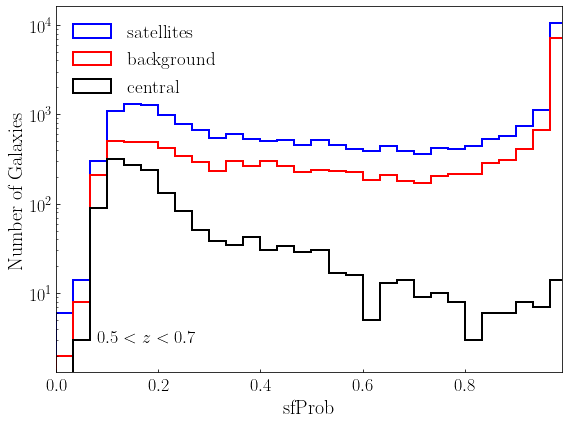

In [6]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))

sfprob_list = cat_stack['sfProb']
sfprob_list_bkg = cat_stack_bkg['sfProb']
sfprob_list_cen = cat_central['sfProb']

plt.hist(sfprob_list,range=(0,1.0),histtype='step',linewidth=2, color='b',bins=30,label='satellites')
plt.hist(sfprob_list_bkg,range=(0,1),histtype='step',linewidth=2, color='r',bins=30,label='background')
plt.hist(sfprob_list_cen,range=(0,1),histtype='step',linewidth=2, color='k',bins=30,label='central')
plt.annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.08]),xycoords='axes fraction',fontsize=18,color='k')

plt.xlabel('sfProb',fontsize=20)
plt.ylabel('Number of Galaxies',fontsize=20)
plt.xlim([0,0.99])
plt.yscale('log')
plt.legend(fontsize=19,loc='upper left',frameon=False)
plt.tight_layout()
plt.savefig('figures/sfprob_hist_'+str(z)+'.png',dpi=150)
plt.show()

## mass function (per group)

z = 0.6


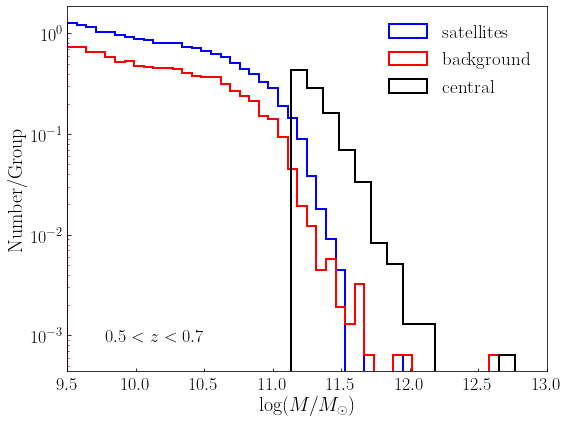

In [7]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
print('z =',z)

mass_list = np.array(cat_stack['MASS_MED'])
mass_list_bkg = np.array(cat_stack_bkg['MASS_MED'])
mass_list_cen = np.array(cat_central['MASS_MED'])
mass_list_all = np.append(mass_list,mass_list_cen)

# plt.hist(mass_list_all,range=(9.5,13),histtype='step',linewidth=2, color='r',bins=50,
#          weights=np.ones(len(mass_list_all))/len(cat_central),label='satellites')

plt.hist(mass_list,range=(9.5,13),histtype='step',linewidth=2, color='b',bins=50,
         weights=np.ones(len(mass_list))/len(cat_central),label='satellites')
plt.hist(mass_list_bkg,range=(9.5,13),histtype='step',linewidth=2, color='r',bins=50,
         weights=np.ones(len(mass_list_bkg))/len(cat_central),label='background')
plt.hist(mass_list_cen,range=(9.5,13),histtype='step',linewidth=2, color='k',bins=30,
         weights=np.ones(len(mass_list_cen))/len(cat_central),label='central')

plt.annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.08]),
             xycoords='axes fraction',fontsize=18,color='k')

plt.ylabel('Number/Group',fontsize=20)
plt.xlabel(r'$\log(M/M_\odot)$',fontsize=20)
plt.yscale('log')
plt.xlim([9.5,13])
plt.legend(fontsize=19,loc='upper right',frameon=False)
plt.tight_layout()
plt.show()


0.9689241541371995 0.97651137517094
1037 1037
0.9645153147036964 0.9747283171095172
1203 1203
0.973596095297644 0.9823453536473126
2130 2130


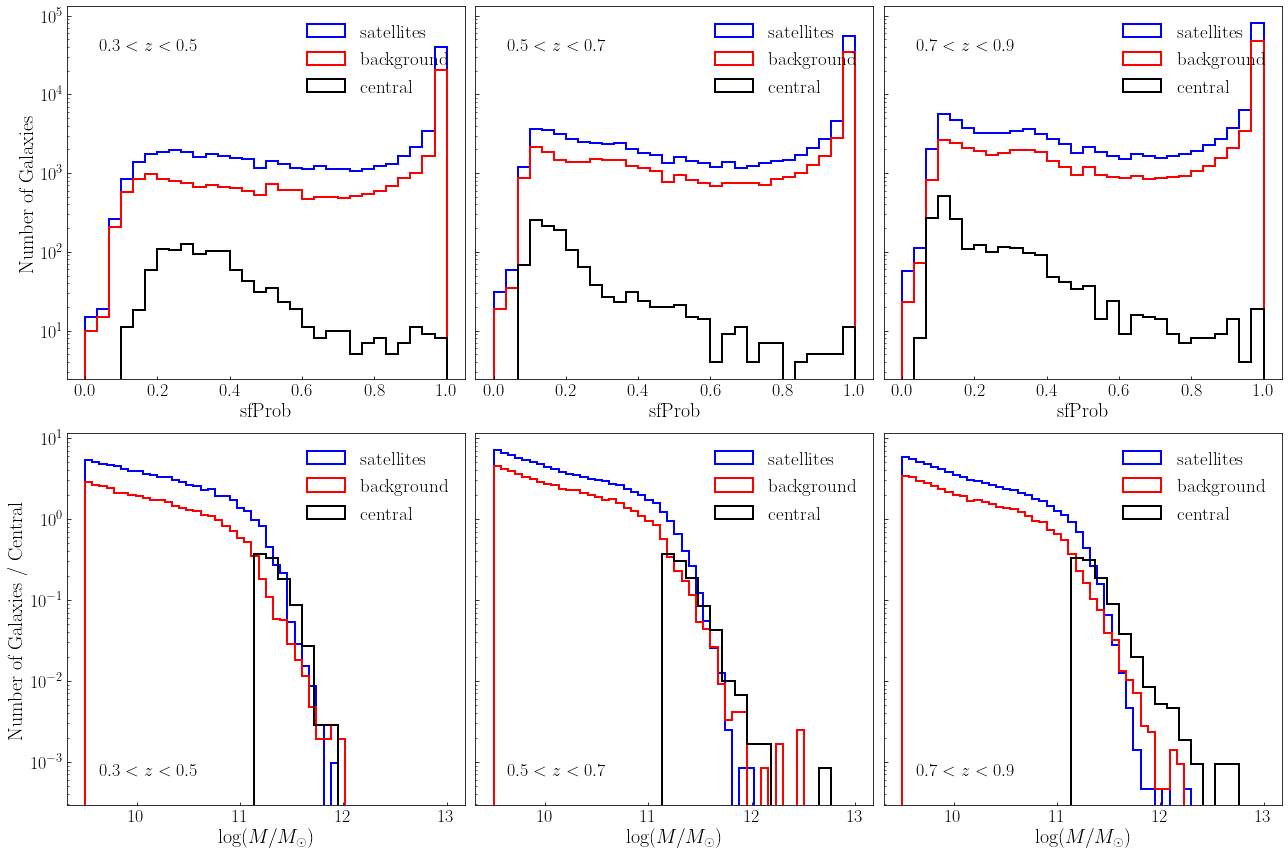

In [62]:
fig, axs = plt.subplots(2, 3, sharey='row', figsize = (18, 12),gridspec_kw={'height_ratios':[4,4]})
zs = [0.4,0.6,0.8]

for i in range(3):
    z=zs[i]
    cat_stack = Table.read('CUT_deep_catalogs/satellite_sample_total_'+str(z)+'.fits')
    cat_stack_bkg = Table.read('CUT_deep_catalogs/background_sample_total_'+str(z)+'.fits')
    cat_central = Table.read('CUT_deep_catalogs/central_sample_total_'+str(z)+'.fits')
    
    cat_stack = np.unique(cat_stack)
    cat_stack_bkg = np.unique(cat_stack_bkg)

    sfprob_list = cat_stack['sfProb']
    sfprob_list_bkg = cat_stack_bkg['sfProb']
    sfprob_list_cen = cat_central['sfProb']
    
    mass_list = np.array(cat_stack['MASS_MED'])
    mass_list_bkg = np.array(cat_stack_bkg['MASS_MED'])
    print(np.median(sfprob_list),np.median(sfprob_list_bkg))
    mass_list_cen = np.array(cat_central['MASS_MED'])
    
    axs[0][i].hist(sfprob_list,range=(0,1.0),histtype='step',linewidth=2, color='b',bins=30,label='satellites')
    axs[0][i].hist(sfprob_list_bkg,range=(0,1),histtype='step',linewidth=2, color='r',bins=30,label='background')
    axs[0][i].hist(sfprob_list_cen,range=(0,1),histtype='step',linewidth=2, color='k',bins=30,label='central')
    
    axs[1][i].hist(mass_list,range=(9.5,13),histtype='step',linewidth=2, color='b',bins=50,
         weights=np.ones(len(mass_list))/len(cat_central),label='satellites')
    axs[1][i].hist(mass_list_bkg,range=(9.5,13),histtype='step',linewidth=2, color='r',bins=50,
         weights=np.ones(len(mass_list_bkg))/len(cat_central),label='background')
    axs[1][i].hist(mass_list_cen,range=(9.5,13),histtype='step',linewidth=2, color='k',bins=30,
         weights=np.ones(len(mass_list_cen))/len(cat_central),label='central')
    print(len(mass_list_cen),len(cat_central))
    
    axs[0][0].set_yscale('log')
    axs[1][0].set_yscale('log')
    axs[0][i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.88]),
             xycoords='axes fraction',fontsize=18,color='k')
    axs[1][i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.08]),
             xycoords='axes fraction',fontsize=18,color='k')
    
    axs[0][i].set_xlabel('sfProb',fontsize=20)
    axs[0][0].set_ylabel('Number of Galaxies',fontsize=20)
    axs[1][i].set_xlabel(r'$\log(M/M_\odot)$',fontsize=20)
    axs[1][0].set_ylabel('Number of Galaxies / Central',fontsize=20)
    
    axs[0][i].legend(fontsize=19,frameon=False)
    axs[1][i].legend(fontsize=19,loc='upper right',frameon=False)

fig.subplots_adjust(wspace=0)  
plt.tight_layout()
plt.savefig('figures/sfprob_mass_hist_combined.png',dpi=150)

### Mass distribution of central sf/q galaxies

1904 193 1711
8
KS-test: 0.0653 0.43790978


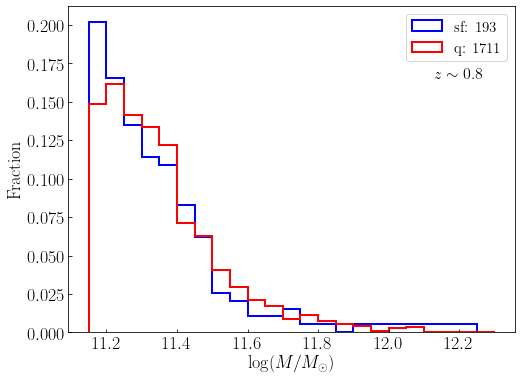

In [48]:
from scipy.stats import ks_2samp
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
z=0.8

sf_mass_list = np.array([])
q_mass_list = np.array([])

cat = Table.read('CUT_deep_catalogs/central_sample_total_'+str(z)+'_SXDS.fits')
cat_sf = cat[cat['sfProb']>=0.5]
cat_q = cat[cat['sfProb']<0.5]
print(len(cat),len(cat_sf),len(cat_q))

print(len(cat[cat['sfProb']==0.5]))

sf_mass_list = cat_sf['MASS_MED']
q_mass_list = cat_q['MASS_MED']
    
weights_sf = np.ones_like(sf_mass_list)/float(len(sf_mass_list))
weights_q = np.ones_like(q_mass_list)/float(len(q_mass_list))

n_sf, bin_edges, pathces = plt.hist(sf_mass_list, weights=weights_sf,bins=np.arange(11.15,12.35,0.05),\
         histtype='step',linewidth=2, color='b',label='sf: '+str(len(sf_mass_list)))
n_q, bin_edges, pathces = plt.hist(q_mass_list, weights=weights_q,bins=np.arange(11.15,12.35,0.05),\
         histtype='step',linewidth=2, color='r',label='q: '+str(len(q_mass_list)))

D,p_value = ks_2samp(sf_mass_list, q_mass_list)
print('KS-test:',round(D,5),round(p_value,8))

plt.ylabel('Fraction',fontsize=18)
plt.xlabel(r'$\log(M/M_\odot)$',fontsize=18)
plt.annotate(r'$z\sim'+str(z)+'$',xy=(0.82,0.78),xycoords='axes fraction',fontsize=16)
plt.legend(fontsize=15)
plt.savefig('figures/central_11.15_hist_'+str(z)+'.png')
plt.show()

193 500
KS-test: 0.02744 0.99992339


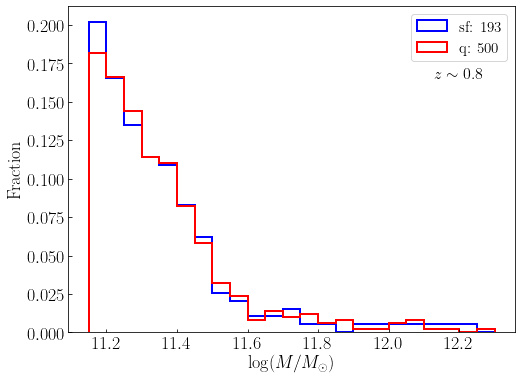

In [49]:
# match mass distribution of sf/q centrals
# cat_sf, cat_q
# sf_mass_list, q_mass_list

N_BINS = 100
SAMPLE_SIZE=500
step = 100 / N_BINS

sf_central_percentiles = [
    np.percentile(sf_mass_list, percentage, axis=0)
    for percentage in np.arange(start=step, stop=100, step=step)
]

# Match each observation in the training set to a bin
q_central_bins = np.digitize(q_mass_list, sf_central_percentiles)

# Count the number of values in each training set bin
q_central_bin_counts = np.bincount(q_central_bins)

# Weight each observation in the training set based on which bin it is in
weights = 1 / np.array([q_central_bin_counts[x] for x in q_central_bins])

# Make the weights sum up to 1
weights_norm = weights / np.sum(weights)

np.random.seed(0)
cat_q_matched = np.random.choice(cat_q, size=SAMPLE_SIZE, p=weights_norm, replace=False)
q_mass_list_matched = cat_q_matched['MASS_MED']
cat_sf.write('CUT_deep_catalogs/isolated_csf_central_matched_'+str(z)+'.fits',overwrite=True)
cat_q_matched = Table(names=cat_sf.colnames, dtype=[str(y[0]) for x, y in cat_sf.dtype.fields.items()],data=cat_q_matched) 
cat_q_matched.write('CUT_deep_catalogs/isolated_cq_central_matched_'+str(z)+'.fits',overwrite=True)
print(len(cat_sf),len(cat_q_matched))

#####
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))

weights_sf = np.ones_like(sf_mass_list)/float(len(sf_mass_list))
weights_q = np.ones_like(q_mass_list_matched)/float(len(q_mass_list_matched))
n_sf, bin_edges, pathces = plt.hist(sf_mass_list, weights=weights_sf,bins=np.arange(11.15,12.35,0.05),\
         histtype='step',linewidth=2, color='b',label='sf: '+str(len(cat_sf)))

n_q, bin_edges, pathces = plt.hist(q_mass_list_matched, weights=weights_q,bins=np.arange(11.15,12.35,0.05),\
         histtype='step',linewidth=2, color='r',label='q: '+str(len(cat_q_matched)))

D,p_value = ks_2samp(sf_mass_list, q_mass_list_matched)
print('KS-test:',round(D,5),round(p_value,8))

plt.ylabel('Fraction',fontsize=18)
plt.xlabel(r'$\log(M/M_\odot)$',fontsize=18)
plt.annotate(r'$z\sim'+str(z)+'$',xy=(0.82,0.78),xycoords='axes fraction',fontsize=16)
plt.legend(fontsize=15)
plt.savefig('figures/central_11.15_hist_'+str(z)+'.png')
plt.show()


### sfprob - mass plots

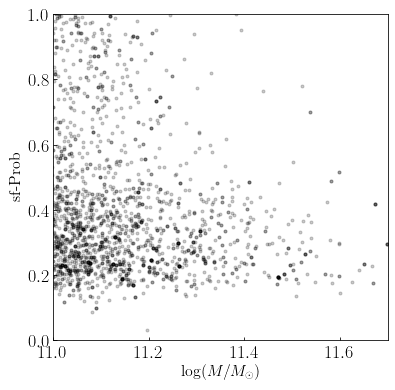

In [54]:
fig = plt.figure(figsize=(6,6))
plt.scatter(mass_list,sfprob_list,marker='.',color='k',alpha=0.2)
plt.xlim([11,11.7])
plt.ylim([0,1])
plt.xlabel('$\log(M/M_\odot)$',fontsize=16)
plt.ylabel('sf-Prob',fontsize=16)
# plt.savefig('figures/mass_sfprob.png',dpi=200)
plt.show()

### stellar mass vs. richness

Text(0, 0.5, 'Richness (No. of Satellites)')

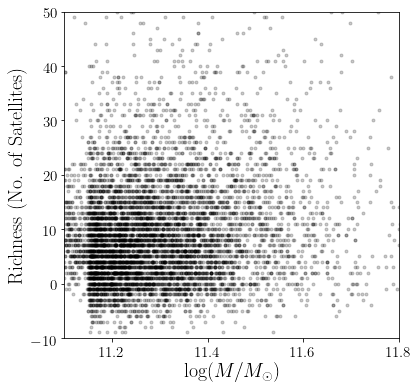

In [73]:
fig = plt.figure(figsize=(6,6))
file_list = glob.glob('CUT_deep_catalogs/massive_gal_positions/*.fits')
for filename in file_list:
    cat = Table.read(filename)
    plt.scatter(cat['MASS_MED'],cat['n_sat']-cat['n_bkg'],color='k',marker='.',alpha=0.2)

plt.xlim([11.1,11.8])
plt.ylim([-10,50])
plt.xlabel(r'$\log(M/M_\odot)$',fontsize=20)
plt.ylabel(r'Richness (No. of Satellites)',fontsize=20)

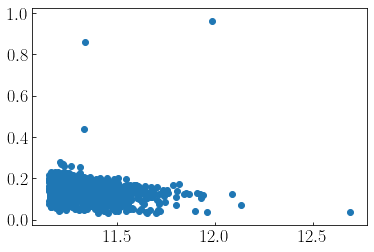

In [11]:
# mass_inf mass_med mass_sup

plt.scatter(cat_central['MASS_MED'],(cat_central['MASS_SUP']-cat_central['MASS_INF'])/2)

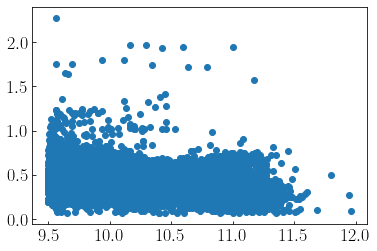

In [14]:
plt.scatter(cat_stack['MASS_MED'], cat_stack['MASS_SUP']-cat_stack['MASS_INF'])